In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report

In [2]:
data=pd.read_csv('diabetes.csv')
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print()
print(df[df['Outcome']==0]['Age'].count())


500


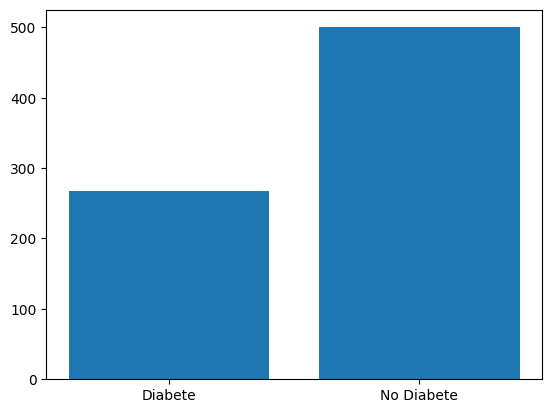

In [6]:
plt.bar(['Diabete','No Diabete'],[df[df['Outcome']==1]['Age'].count(),df[df['Outcome']==0]['Age'].count()])
plt.show()

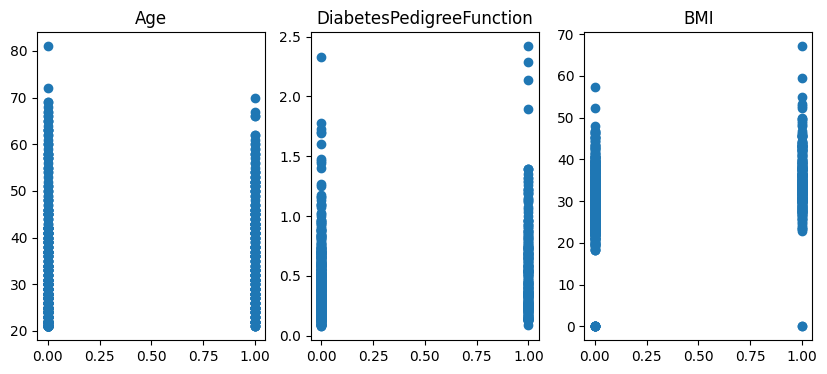

In [7]:
fig, axs = plt.subplots(1,3,sharex=False, figsize=(10, 4))
axs[0].scatter(df.Outcome,df.Age)
axs[0].set_title('Age')
axs[1].scatter(df.Outcome,df.DiabetesPedigreeFunction)
axs[1].set_title('DiabetesPedigreeFunction')
axs[2].scatter(df.Outcome,df.BMI)
axs[2].set_title('BMI')
plt.show()

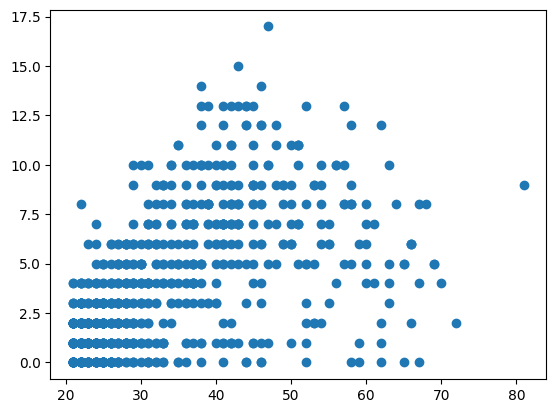

In [8]:
plt.scatter(df.Age,df.Pregnancies)

In [9]:
x=df.drop(columns=['Outcome'])
y=df['Outcome'].values.reshape(-1,1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

In [11]:
logreg=LogisticRegression(solver="liblinear")
logreg.fit(x_train,y_train)
pred=logreg.predict(x_test)

In [12]:
accuracy_score(y_test,pred)

0.8072916666666666

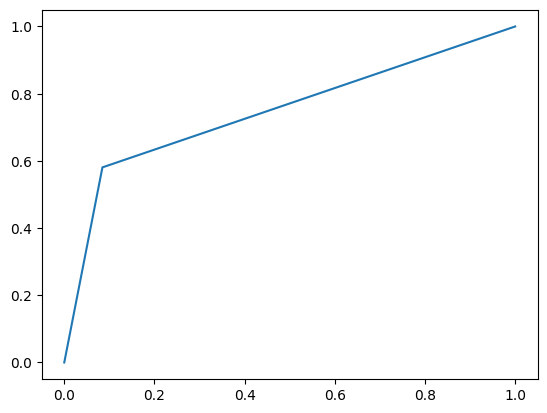

In [13]:
fpr,tpr,_=roc_curve(y_test,pred)
plt.plot(fpr,tpr)

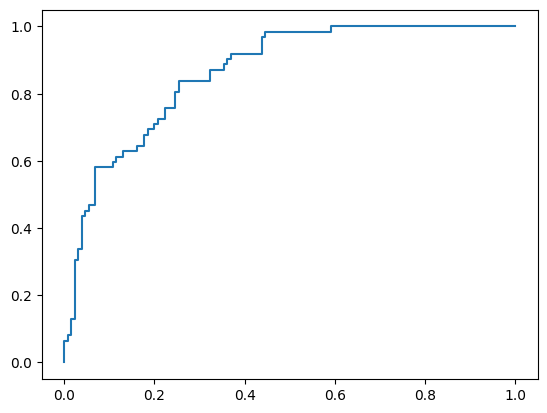

In [14]:
pred_proba=logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=roc_curve(y_test,pred_proba)
plt.plot(fpr,tpr)

In [15]:
logreg.score(x,y)

0.76953125

In [16]:
confusion_matrix(y,logreg.predict(x))

array([[443,  57],
       [120, 148]])

In [17]:
print(classification_report(y,logreg.predict(x)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



accuracy_score :  0.8125
score: 0.7786458333333334
Confusion Matrix:
 [[446  54]
 [116 152]]

 ______

Classification Report:               precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.74      0.57      0.64       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



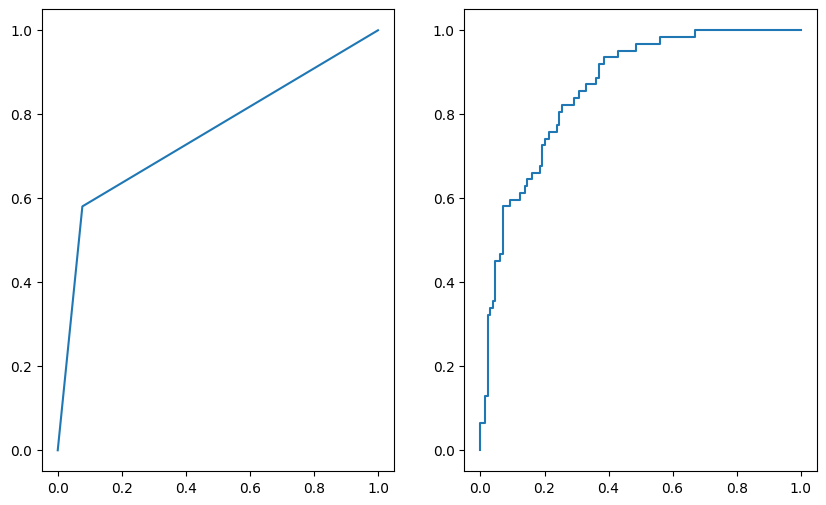

In [66]:
# logreg=LogisticRegression(solver="liblinear",C=2)
# logreg.fit(x_train,y_train)
# pred=logreg.predict(x_test)
# print ("accuracy_score : ",accuracy_score(y_test,pred))
# print ("score:",logreg.score(x,y))
# print ("Confusion Matrix:\n",confusion_matrix(y,logreg.predict(x)))
# print("\n ______\n")
# print ("Classification Report:",classification_report(y,logreg.predict(x)))
# fig, axs = plt.subplots(1,2,sharex=False,figsize=(10,6))
# fpr,tpr,_=roc_curve(y_test,pred)
# pred_proba=logreg.predict_proba(x_test)[::,1]
# fpr2,tpr2,_=roc_curve(y_test,pred_proba)
# axs[0].plot(fpr,tpr)
# axs[1].plot(fpr2,tpr2)

In [18]:
kfold_validation=KFold(10)
results=cross_val_score(logreg,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.7012987  0.81818182 0.74025974 0.71428571 0.77922078 0.75324675
 0.85714286 0.80519481 0.72368421 0.80263158]
0.7695146958304853
